In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import copy
import seaborn as sns
import os
import glob
import re
import gc

# 1.データの読み込み

In [2]:
train_data = pd.read_csv('train.csv', encoding='utf8')
test_data = pd.read_csv('test.csv', encoding='utf8')

In [3]:
train_data.head(10)

,id,title,abstract,judgement
0,0,One-year age changes in MRI brain volumes in o...,Longitudinal studies indicate that declines in...,0
1,1,Supportive CSF biomarker evidence to enhance t...,The present study was undertaken to validate t...,0
2,2,Occurrence of basal ganglia germ cell tumors w...,Objective: To report a case series in which ba...,0
3,3,New developments in diagnosis and therapy of C...,The etiology and pathogenesis of idiopathic ch...,0
4,4,Prolonged shedding of SARS-CoV-2 in an elderly...,NaN,0
5,5,From bench to bedside: Molecular imaging in in...,Purpose of review Standard structural imaging ...,0
6,6,Left gonadal vein thrombosis in a patient with...,COVID-19 disease is a viral illness that predo...,0
7,7,Development and validation of a prediction mod...,OBJECTIVES: We aimed to develop and validate a...,0
8,8,Rehabilitation and Covid-19: the Cochrane Reha...,INTRODUCTION: This paper improves the methodol...,0
9,9,Slow gait in MCI is associated with ventricula...,Slow gait is ubiquitous among older adults and...,0


In [4]:
test_data.head(10)

,id,title,abstract
0,27145,Estimating the potential effects of COVID-19 p...,The objective of the paper is to analyse chang...
1,27146,Leukoerythroblastic reaction in a patient with...,NaN
2,27147,[15O]-water PET and intraoperative brain mappi...,[15O]-water PET was performed on 12 patients w...
3,27148,Adaptive image segmentation for robust measure...,We present a method that significantly improve...
4,27149,Comparison of Epidemiological Variations in CO...,The objective of this study is to compare the ...
5,27150,Anthraquinone Derivatives as an Immune Booster...,Anthraquinone derivatives are identified for t...
6,27151,Discriminatory and predictive capabilities of ...,BACKGROUND: Multiplex assays such as xMAP have...
7,27152,PET imaging of gliomas using novel tracers: A ...,NaN
8,27153,Symmetrical nail bed uptake on a (99m)Tc-HDP b...,NaN
9,27154,Automatic brain MR images diagnosis based on e...,A new automatic system to detect pathologies i...


# 2.データクレンジング

## 欠損値の処理

In [5]:
train_data.isnull().sum()

id              0
title           0
abstract     4390
judgement       0
dtype: int64

In [6]:
#nullは削除する
train_data = train_data.fillna('')

In [7]:
test_data.isnull().sum()

id             0
title          0
abstract    6546
dtype: int64

In [8]:
#nullは削除する
test_data = test_data.fillna('')

## title + abstract = text

In [9]:
train_data['text'] = train_data['title'] + train_data['abstract']

In [10]:
test_data['text'] = test_data['title'] + test_data['abstract']

## id text judgement を使う

In [11]:
train_data = train_data[['id', 'text', 'judgement']]

In [12]:
test_data = test_data[['id', 'text']]

In [13]:
train_data.head(10)

,id,text,judgement
0,0,One-year age changes in MRI brain volumes in o...,0
1,1,Supportive CSF biomarker evidence to enhance t...,0
2,2,Occurrence of basal ganglia germ cell tumors w...,0
3,3,New developments in diagnosis and therapy of C...,0
4,4,Prolonged shedding of SARS-CoV-2 in an elderly...,0
5,5,From bench to bedside: Molecular imaging in in...,0
6,6,Left gonadal vein thrombosis in a patient with...,0
7,7,Development and validation of a prediction mod...,0
8,8,Rehabilitation and Covid-19: the Cochrane Reha...,0
9,9,Slow gait in MCI is associated with ventricula...,0


In [14]:
test_data.head(10)

,id,text
0,27145,Estimating the potential effects of COVID-19 p...
1,27146,Leukoerythroblastic reaction in a patient with...
2,27147,[15O]-water PET and intraoperative brain mappi...
3,27148,Adaptive image segmentation for robust measure...
4,27149,Comparison of Epidemiological Variations in CO...
5,27150,Anthraquinone Derivatives as an Immune Booster...
6,27151,Discriminatory and predictive capabilities of ...
7,27152,PET imaging of gliomas using novel tracers: A ...
8,27153,Symmetrical nail bed uptake on a (99m)Tc-HDP b...
9,27154,Automatic brain MR images diagnosis based on e...


# 3.自然言語処理

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

## 正規化

In [16]:
#小文字に統一
train_data['text'] = train_data['text'].str.lower()
test_data['text'] = test_data['text'].str.lower()

## 数値と文字と記号の分割

In [17]:
def word_num_split(x):
    #数値と文字を分ける
    text = re.findall('\d+|\D+', x)
    text1 = ' '.join(text)
    text1 = text1.replace('  ', ' ')
    
    #記号と分ける
    text2 = re.findall('\W|\w+', text1)
    text2 = ' '.join(text2)
    text2 = text2.replace('  ', ' ')

    #数字を消す
    text3 = re.sub(r'[0-9]', '',text２)
    
    # 一文字は消す
    text4 = re.findall('[a-z]{3,}', text3)
    text4 = ' '.join(text4)

    return text4

In [18]:
train_data['text'] = train_data['text'].apply(word_num_split)
test_data['text'] = test_data['text'].apply(word_num_split)

## stop word

In [19]:
def remove_stop_words(sentence):
    stop_words = [".", ",","(",")",">", "<","*", ":", ";","\\", "_", "\"","'", "=", "?", "-"] # 適当な文字を設定
    for s in stop_words:
        sentence = sentence.replace(s, '')
    return sentence

In [20]:
train_data['text'] = train_data['text'].apply(remove_stop_words)
test_data['text'] = test_data['text'].apply(remove_stop_words)

In [21]:
train_data.head(10)

,id,text,judgement
0,0,one year age changes mri brain volumes older a...,0
1,1,supportive csf biomarker evidence enhance the ...,0
2,2,occurrence basal ganglia germ cell tumors with...,0
3,3,new developments diagnosis and therapy crohn d...,0
4,4,prolonged shedding sars cov elderly liver tran...,0
5,5,from bench bedside molecular imaging inflammat...,0
6,6,left gonadal vein thrombosis patient with covi...,0
7,7,development and validation prediction model fo...,0
8,8,rehabilitation and covid the cochrane rehabili...,0
9,9,slow gait mci associated with ventricular enla...,0


In [22]:
test_data.head(10)

,id,text
0,27145,estimating the potential effects covid pandemi...
1,27146,leukoerythroblastic reaction patient with covi...
2,27147,water pet and intraoperative brain mapping com...
3,27148,adaptive image segmentation for robust measure...
4,27149,comparison epidemiological variations covid pa...
5,27150,anthraquinone derivatives immune booster and t...
6,27151,discriminatory and predictive capabilities enz...
7,27152,pet imaging gliomas using novel tracers sleepi...
8,27153,symmetrical nail bed uptake hdp bone scan pati...
9,27154,automatic brain images diagnosis based edge fr...


## 数値表現化

In [23]:
vectorizer = TfidfVectorizer(token_pattern=r"(?u)\b\w+\b")
train_data_mat = vectorizer.fit_transform(train_data["text"])
train_data_vec = pd.DataFrame(train_data_mat.toarray(), columns=[ x[0] for x in sorted(vectorizer.vocabulary_.items(), key=lambda x: x[1]) ], dtype="float16")

In [24]:
vectorizer = TfidfVectorizer(token_pattern=r"(?u)\b\w+\b")
test_data_mat = vectorizer.fit_transform(test_data["text"])
test_data_vec = pd.DataFrame(test_data_mat.toarray(), columns=[ x[0] for x in sorted(vectorizer.vocabulary_.items(), key=lambda x: x[1]) ], dtype="float16")

In [25]:
del train_data_mat, test_data_mat
gc.collect()

145

In [26]:
#共通している単語
common_columns = train_data_vec.columns & test_data_vec.columns
common_columns

<ipython-input-26-51a3858239f2>:2: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  common_columns = train_data_vec.columns & test_data_vec.columns


Index(['aaa', 'aaas', 'aabb', 'aac', 'aacd', 'aachen', 'aacr', 'aad', 'aada',
       'aae',
       ...
       'zung', 'zuo', 'zurich', 'zusanli', 'zvad', 'zwitterionic', 'zygotes',
       'zymogen', 'zymography', 'zymosan'],
      dtype='object', length=40687)

In [27]:
train = train_data_vec[common_columns]
test = test_data_vec[common_columns]

In [28]:
train_data_vec.head(10)

,aaa,aaaai,aaas,aabb,aabip,aac,aacd,aace,aachen,aacocf,...,zvad,zwieten,zwitterionic,zxsu,zygotes,zymogen,zymogram,zymography,zymosan,zymosterol
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
test_data_vec.head(10)

,aaa,aaaa,aaad,aaas,aab,aabb,aabd,aac,aacap,aacd,...,zwitterionic,zydus,zygomatic,zygosity,zygotes,zymogen,zymogens,zymography,zymosan,zzy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
del train_data_vec, test_data_vec
gc.collect()

0

# 4.機械学習

## データの作成

In [31]:
from sklearn.model_selection import train_test_split

X = train
y = train_data['judgement']         

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0)

print('X_train Features Shape: ', X_train.shape)
print('y_train Target Shape: ', y_train.shape)
print('X_val Features Shape: ', X_val.shape)
print('y_val Target Shape: ', y_val.shape)

X_train Features Shape:  (19001, 40687)
y_train Target Shape:  (19001,)
X_val Features Shape:  (8144, 40687)
y_val Target Shape:  (8144,)


In [32]:
del train, train_data
gc.collect()

0

In [33]:
#分類問題の精度
def show_evaluation_metrics(y_true, y_pred):
    print("Accuracy:")
    print(accuracy_score(y_true, y_pred))
    print()
    
    print("Report:")
    print(classification_report(y_true, y_pred))
    
    print("Confusion matrix:")
    print(confusion_matrix(y_true, y_pred))

## LightGBM

In [34]:
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, fbeta_score

train_model = LGBMClassifier()
train_model.fit(X_train, y_train)
y_proba = train_model.predict_proba(X_val)

In [35]:
Threshold=0.023
y_pred = np.where(y_proba[:,1]<Threshold, 0, 1)

print("F-Beta Score:", fbeta_score(y_val, y_pred, beta=7.0))
print()
show_evaluation_metrics(y_pred, y_val)

F-Beta Score: 0.7119565217391304

Accuracy:
0.9634086444007859

Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      7764
           1       0.73      0.34      0.47       380

    accuracy                           0.96      8144
   macro avg       0.85      0.67      0.72      8144
weighted avg       0.96      0.96      0.96      8144

Confusion matrix:
[[7715   49]
 [ 249  131]]


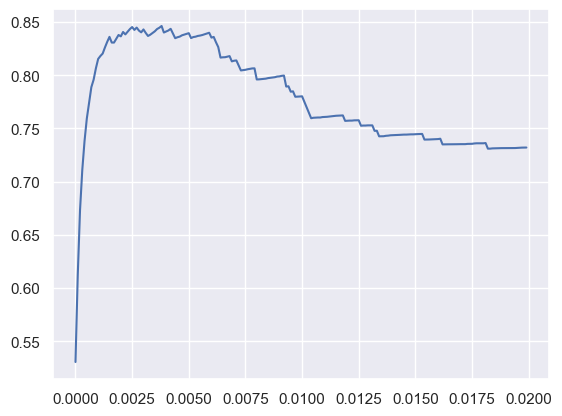

Best Threshold : 0.0038
Best F-Beta-Score : 0.8463274517849817


In [36]:
Threshold_list = []
f_beta_score_list = []
for i in range(200):
    Threshold = i*0.0001
    y_pred = np.where(y_proba[:,1] < Threshold, 0, 1)
    Threshold_list.append(Threshold)
    f_beta_score_list.append(fbeta_score(y_val, y_pred, beta=7.0))
sns.set()
plt.plot(Threshold_list, f_beta_score_list)
plt.show()
for i,j in zip(Threshold_list, f_beta_score_list):
    if j == max(f_beta_score_list):
        print('Best Threshold :',i)
        print('Best F-Beta-Score :',j)
        break

## 最終モデル

In [37]:
model = LGBMClassifier()
model.fit(X,y) 

LGBMClassifier()

## モデルの保存・読み込み

In [38]:
import pickle

In [39]:
#モデルの保存
with open('model_xgb.pickle', 'wb') as f:
    pickle.dump(model, f)

In [40]:
#モデルの読み込み
with open('model_xgb.pickle', 'rb') as f:
    model = pickle.load(f)

# testデータで予測

In [41]:
proba = model.predict_proba(test)

Best_Threshold = 0.0038
predict = np.where(proba[:,1]<Best_Threshold, 0, 1)

# 最終提出

In [42]:
sample = pd.read_csv('sample_submit.csv', header=None)

In [43]:
submission = sample.copy()

In [44]:
submission[1] = predict

In [45]:
#submission.to_csv('submission.csv', index=None, header=None)